In [1]:
import DataHandlers
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
confirmed_fte = (27.50, 29.00, 31.50, 33.00, 31.50, 35.50, 38.50, 37.00, 34.00, 26.50, 26.50, 24.50, 23.50, 22.50, 20.00, 18.00, 18.00, 17.00, 17.00, 16.50, 14.50, 15.50, 15.50, 15.50)
confirmed_fte = pd.Series(confirmed_fte, 
                          index=pd.date_range(start=pd.datetime(2019,4,1),end=pd.datetime(2021,3,31), freq='M'),
                          name='from spreadsheet')
confirmed_fte.index = confirmed_fte.index

In [3]:
fc = DataHandlers.Forecast(data_source='csv')

In [4]:
#start_date = fc.date_range.min()
#end_date = fc.date_range.max()

start_date = pd.datetime(2017,2,28)
end_date = pd.datetime(2022,5,1)

In [5]:
reqs = fc.project_reqs.sum(axis=1)
reqs = DataHandlers.select_date_range(reqs, start_date, end_date, drop_zero_cols=False)

reqs = reqs.resample('M').mean() 

# exclude hut 23, trac days etc. ???

capacity = pd.Series(index=reqs.index)

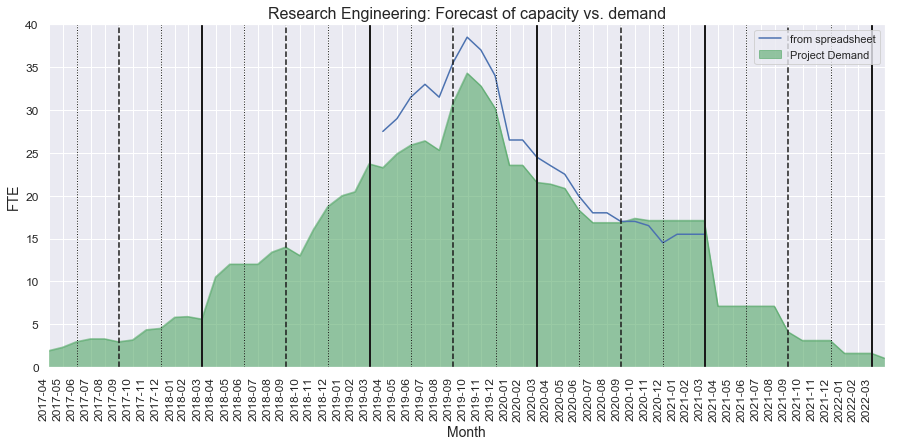

In [7]:
fig = plt.figure(figsize=(15,7))
ax = fig.gca()

reqs.plot.area(ax=ax, label='Project Demand', x_compat=True, rot=90, alpha=0.6, color='g')

confirmed_fte.plot(ax=ax, rot=90)

xlim = ax.get_xlim()

#ylim = ax.get_ylim()
ylim = (0,40)

quarters = pd.date_range(start=reqs.index.min(),end=reqs.index.max(),freq='QS')
for q in quarters:
    if q.month==4:
        linestyle = '-'
        linewidth = '2'
    
    elif q.month==7:
        linestyle = ':'
        linewidth = '1'        
    
    elif q.month==10:
        linestyle = '--'
        linewidth = '1.5'        
    
    elif q.month==1:
        linestyle = ':'
        linewidth = '1'
    
    ax.plot([q, q], ylim, linestyle=linestyle, linewidth=linewidth, color='k')

# format tick labels
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.set_xticklabels(reqs.index.strftime("%Y-%m").values, fontsize=12)
plt.yticks(fontsize=12)

ax.legend()
ax.set_ylabel('FTE', fontsize=14)
ax.set_xlabel('Month', fontsize=14)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('Research Engineering: Forecast of capacity vs. demand', fontsize=16);

In [24]:
reqs['2019-10']
tmp=fc.project_reqs.resample('MS').mean()['2019-10'].T
tmp.columns = ['fte']
tmp.sort_values(by='fte',ascending=False,inplace=True)

tmp.index = [fc.get_project_name(idx) for idx in tmp.index]

tmp

,fte
Living With Machines,2.6
Wrattler,2.0
SPF TPS 2019+,2.0
Fusion modelling- IDEA,2.0
UQM^3,1.5
NATS,1.5
"Leeds: Lomax, Malleson, Heppenstall",1.0
DS for Sustainable Development,1.0
AI assisted diagnosis of children,1.0
Clean Air,1.0


,Data science at scale,Data science for science and the humanities,Data-centric engineering,Defence and security,External,Finance and economics,Health,Hut 23,Public Policy,Research Support,Seed,"Tools, Practices, and Systems",UCL,Urban analytics,Wellcome Trust
2017-06-30,0.000000,0.000000,0.165451,1.112111,0.000000,0.022910,0.000000,0.500000,0.000000,0.180328,0.434426,0.000000,0.000000,0.000000,0.000000
2017-09-29,0.000000,0.000000,0.688027,0.830000,0.000000,0.032500,0.000000,0.500000,0.000000,0.500000,0.625000,0.000000,0.000000,0.000000,0.000000
2017-12-29,0.275774,0.000000,0.541310,1.661091,0.037698,0.076925,0.000000,0.500000,0.000000,0.500000,0.390714,0.000000,0.000000,0.000000,0.000000
2018-03-30,0.423750,0.000000,1.069821,3.207083,0.043651,0.078750,0.000000,0.500000,0.000000,0.312500,0.125754,0.000000,0.000000,0.000000,0.000000
2018-06-29,0.580645,0.042339,2.750000,3.084677,0.542339,0.040323,1.298387,2.000000,0.000000,0.000000,1.008065,0.000000,0.000000,0.169355,0.000000
2018-09-28,1.089844,0.898438,2.386719,2.835938,0.500000,0.234375,0.937500,2.000000,0.000000,0.000000,1.570312,0.000000,0.000000,0.656250,0.000000
2018-12-31,1.750000,1.850000,2.492187,2.828125,0.000000,0.417969,0.449219,1.557812,0.781250,0.000000,0.531250,2.107812,0.000000,1.000000,0.000000
2019-03-29,0.000000,2.350000,3.202381,3.968254,0.000000,0.500000,1.506349,1.677778,0.534921,0.000000,0.833333,5.307937,0.000000,1.500000,0.000000
2019-06-28,0.000000,2.809016,6.319672,2.491803,0.000000,0.500000,1.469262,1.872131,0.797131,0.000000,0.903279,3.790984,0.250000,3.491803,0.000000
2019-09-30,0.000000,2.850000,8.323077,3.258462,0.000000,0.500000,2.630769,0.876923,1.000000,0.000000,0.500000,3.100000,0.250000,3.853846,0.323077


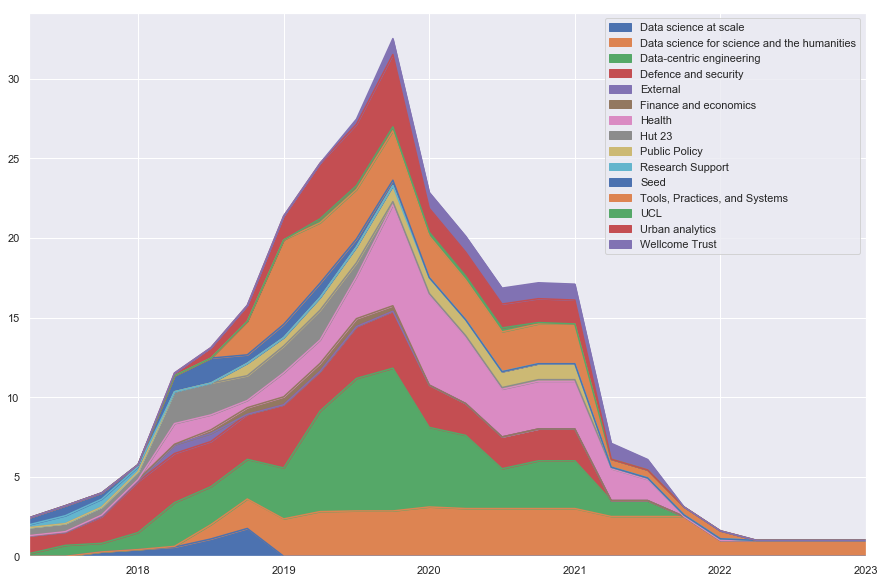

In [9]:
import numpy as np
project_ids = fc.project_reqs.copy().columns
clients=[]
for project in project_ids:
    client_id = fc.projects.loc[project, 'client_id']
    
    if not np.isnan(client_id):
        clients.append(fc.clients.loc[client_id,'name'])
    else:
        clients.append('NaN')
    

client_meanfte = fc.project_reqs.copy()
client_meanfte = client_meanfte.groupby(clients,axis=1).sum()
client_meanfte = client_meanfte.resample('BQ').mean()

client_meanfte = client_meanfte.loc[:,client_meanfte.sum()>0]

ax = plt.figure(figsize=(15,10)).gca()
client_meanfte.plot.area(ax=ax)

client_meanfte

In [10]:
clients.columns

AttributeError: 'list' object has no attribute 'columns'